In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-bar-2020/chocolate.csv
/kaggle/input/chocolate-bar-2020/chocolate_taste_dataset.csv


In [2]:
#Read-in the the dat
chocolate_raw_df = pd.read_csv('../input/chocolate-bar-2020/chocolate.csv')

#lets take a look at the dataframe...
chocolate_raw_df.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [3]:
#Make a copy of the dataframe so as not to modify the original
chocolate_df = chocolate_raw_df.copy()

#Drop unnecessary column
chocolate_df = chocolate_df.drop('Unnamed: 0', axis = 1)

#look at the dataframe
chocolate_df


,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [4]:
#Let's view these 20 columns in a list...
chocolate_df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

In [5]:
#let's take a look for any missing data
chocolate_df.isna().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

Data likely complete; a chocolate bar might not have any tastes after the first

In [6]:

chocolate_df.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [7]:
def change_to_int(column):
    return column.map(lambda x: 0 if 'not' in x else 1)

In [8]:
ingredients = ['beans','cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']

chocolate_df['beans'] = change_to_int(chocolate_df['beans'])
chocolate_df['cocoa_butter'] = change_to_int(chocolate_df['cocoa_butter'])
chocolate_df['vanilla'] = change_to_int(chocolate_df['vanilla'])
chocolate_df['lecithin'] = change_to_int(chocolate_df['lecithin'])
chocolate_df['salt'] = change_to_int(chocolate_df['salt'])
chocolate_df['sugar'] = change_to_int(chocolate_df['sugar'])
chocolate_df['sweetener_without_sugar'] = change_to_int(chocolate_df['sweetener_without_sugar'])


chocolate_df.head()


,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,1,1,0,0,0,1,0,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,1,1,0,0,0,1,0,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,1,1,0,0,0,1,0,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,1,1,0,1,0,1,0,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,1,1,0,1,0,1,0,vegetal,nutty,NaN,NaN


In [9]:
len(chocolate_df)

2224

In [10]:
chocolate_ingredients_df = chocolate_df[ingredients]
chocolate_ingredients_df.apply(pd.Series.value_counts)



,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,NaN,689,1876,1745,2187,82,2148
1,2224.0,1535,348,479,37,2142,76


In [11]:
chocolate_ingredients_df.describe()

,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
count,2224.0,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1.0,0.690198,0.156475,0.215378,0.016637,0.963129,0.034173
std,0.0,0.462516,0.363387,0.411177,0.127935,0.188486,0.181713
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
chocolate_df.company.value_counts().head(10)

Soma        52
Arete       32
Fresco      31
Bonnat      28
Pralus      26
A. Morin    25
Domori      22
Guittard    22
Valrhona    22
Zotter      21
Name: company, dtype: int64

In [13]:
chocolate_df.rating.value_counts()

3.50    489
3.00    471
3.25    394
2.75    304
3.75    265
2.50    149
4.00    101
2.00     29
2.25     14
1.50      5
1.75      1
2.60      1
1.00      1
Name: rating, dtype: int64

In [14]:
ratings = []
for i in chocolate_df.rating:
    if i >= 4:
        review = 'Outstanding'
    elif i < 4 and i >=3.5:
        review = 'Highly Recommended'
    elif i < 3.5 and i >= 3:
        review = 'Recommended'
    elif i < 3 and i >= 2:
        review = 'Disappointing '
    else:
        review = 'Unpleasant'
    ratings.append(review)
    
chocolate_df['Review'] = ratings

recommendation_stats = chocolate_df.Review.value_counts().reset_index()
recommendation_stats


,index,Review
0,Recommended,865
1,Highly Recommended,754
2,Disappointing,497
3,Outstanding,101
4,Unpleasant,7


In [15]:
#re-order rows
new_order = [3,2,4,1,5]

recommendation_stats['new order'] = new_order
recommendation_stats = recommendation_stats.sort_values(by = ['new order'], ascending = True).reset_index()
#recommendation_stats = recommendation_stats.sort_values(by = ['new order'], ascending = True)#.set_index('new order')
recommendation_stats

,level_0,index,Review,new order
0,3,Outstanding,101,1
1,1,Highly Recommended,754,2
2,0,Recommended,865,3
3,2,Disappointing,497,4
4,4,Unpleasant,7,5


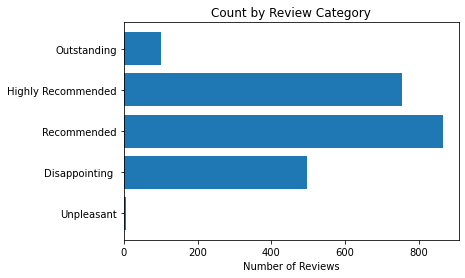

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

y_pos = np.arange(5)
x = recommendation_stats['Review']
#print(x)

ax.barh(y_pos, x)
ax.set_yticks(y_pos, labels=recommendation_stats['index'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Reviews')
ax.set_title('Count by Review Category')

plt.show()